# Chess Agent ♛

## Import dependencies

The dataset is from a free and open source chess serves, [Lichess](https://lichess.org/), filtered by elite players rated 2400+ against players rated 2200+.

[Litchess Elite Database](https://database.nikonoel.fr/)

In [5]:
!pip install chess python-lichess


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import lichess.api
from lichess.format import SINGLE_PGN

In [253]:
import chess
import chess.pgn

import chess.engine
import asyncio

from transformers import AutoTokenizer
import transformers 
import torch

## Load data

Chess games are often stored in PGN format, which is just a text file with information about the game and the moves.

In [ ]:
filepath = r"data\lichess_elite_2013-09.pgn"

pgn = open(filepath)
print(pgn)

<_io.TextIOWrapper name='data\\lichess_elite_2013-09.pgn' mode='r' encoding='cp1250'>


In [ ]:
while True:
    game = chess.pgn.read_game(pgn)
    if game is None:
        break
    board = game.board()
    
    for i, move in enumerate(game.mainline_moves()):
        #print(board.fen())
        #print(move)
        board.push(move)
        if i == 40:
            break
    print("-----------------")


e2e4
d7d5
e4d5
d8d5
b1c3
d5a5
d2d4
c7c6
g1f3
g8f6
f1c4
c8g4
h2h3
g4h5
e1g1
e7e6
g2g4
f6g4
h3g4
h5g4
c4e2
f8d6
c3e4
d6c7
e4c5
c7d6
c5b7
a5c7
b7d6
c7d6
d1d2
g4f5
c2c4
h7h5
d2f4
d6b4
d4d5
c6d5
c4d5
b4f4
c1f4
-----------------
d2d4
d7d5
b1c3
g8f6
c1g5
b8d7
a2a3
h7h6
g5h4
c7c6
h2h3
e7e5
d4e5
d7e5
h4g3
e5c4
b2b3
c4a3
e2e3
d8a5
g1e2
a3c2
d1c2
a5a1
c2d1
a1d1
c3d1
c8f5
e2d4
f8b4
e1e2
f5b1
f2f3
a7a6
g3e1
b4e1
e2e1
c6c5
d4e2
e8c8
e1d2
-----------------
d2d4
d7d5
b1c3
g8f6
c1g5
b8d7
g1f3
g7g6
d1d2
f6e4
c3e4
d5e4
f3e5
d7e5
d4e5
d8d2
g5d2
f8g7
d2c3
c8e6
e1c1
f7f6
f2f3
f6e5
f3e4
e8g8
g2g3
f8f2
c3e1
f2f8
f1g2
c7c5
e1c3
b7b5
a2a3
a7a5
c1b1
b5b4
a3b4
a5b4
c3e1
-----------------
e2e4
d7d5
e4d5
d8d5
b1c3
d5a5
d2d4
c7c6
g1f3
g8f6
c1d2
a5c7
f1c4
c8g4
e1g1
e7e6
h2h3
g4h5
d1e2
f8e7
g2g4
h5g6
f3e5
b8d7
d2f4
d7e5
f4e5
c7b6
c4b3
a8d8
a2a4
d8d4
a4a5
b6c5
e5d4
c5d4
a1a4
d4c5
f1d1
h7h5
e2c4
-----------------
g1f3
g8f6
g2g3
d7d5
f1g2
c8g4
e1g1
b8d7
b2b3
e7e5
c1b2
f8d6
d2d4
d8e7
c2c4
e5e4
c4c5
d6c5
d4c5
e4f3
e2f3
g4e

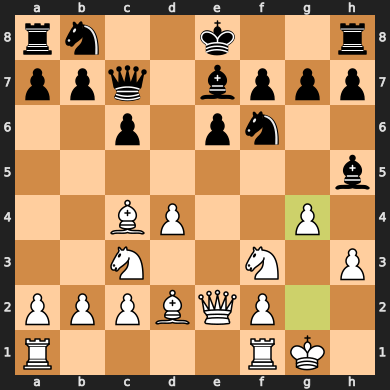

In [70]:
board

In [75]:
board.fen()

'rn2k2r/ppq1bppp/2p1pn2/7b/2BP2P1/2N2N1P/PPPBQP2/R4RK1 b kq - 0 11'

In [243]:
game = chess.pgn.read_game(pgn)
board = game.board()
    

## LLM

In [211]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer

# Load a small LLM (Mistral-7B)
#model_name = "mistralai/Mistral-7B-Instruct"
model_name = "TinyLlama/TinyLlama-1.1B-Chat-v1.0"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForCausalLM.from_pretrained(model_name, torch_dtype=torch.float16, device_map="auto")


tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

c:\Users\Dell\AppData\Local\Programs\Python\Python312\Lib\site-packages\huggingface_hub\file_download.py:142: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Dell\.cache\huggingface\hub\models--TinyLlama--TinyLlama-1.1B-Chat-v1.0. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/608 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.20G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

Some parameters are on the meta device because they were offloaded to the disk and cpu.


In [215]:
def generate_move(fen):
    """Generates a move from a given FEN using LLM"""
    
    # Format input as a chess prompt
    prompt = f"Given the board position in FEN format: {fen}, what is the best move in UCI notation?"

    # Tokenize input
    inputs = tokenizer(prompt, return_tensors="pt")

    # Generate response
    with torch.no_grad():
        output = model.generate(**inputs)

    # Decode response
    response = tokenizer.decode(output[0], skip_special_tokens=True)

    # Extract move (Assume model outputs something like 'Best move: e2e4')
    #move = response.split()[-1]  # Extract last token as move
    move = response.split()
    return move

def validate_and_play(fen):
    """Validates the move and updates board state"""
    board = chess.Board(fen)
    move = generate_move(fen)

    if move in [m.uci() for m in board.legal_moves]:  # Validate move
        board.push_uci(move)
        print(f"Move Played: {move}")
    else:
        print(f"Invalid Move Suggested: {move}")

    return board.fen()  # Return updated FEN


fen = "rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR b KQkq e3 0 1"  # After 1. e4
#new_fen = validate_and_play(fen)

print(generate_move(fen))
#print("Updated Board State:", new_fen)


['Given', 'the', 'board', 'position', 'in', 'FEN', 'format:', 'rnbqkbnr/pppppppp/8/8/4P3/8/PPPP1PPP/RNBQKBNR', 'b', 'KQkq', 'e3', '0', '1,', 'what', 'is', 'the', 'best', 'move', 'in', 'UCI', 'notation?']


In [ ]:
def get_prompt(board, history="x", info="x"):
    return f"""You are a chess grandmaster. Your task is to play the best move.
    FEN: {board.fen()}
    Last Moves: {history}  
    Evaluation: {info} 

Respond with only the best move in UCI format."""


print(get_prompt(board, game.mainline_moves(), 22))

In [254]:

#model = "PY007/TinyLlama-1.1B-Chat-v0.1"
#tokenizer = AutoTokenizer.from_pretrained(model)
pipeline = transformers.pipeline(
    "text-generation",
    model=model,
    torch_dtype=torch.float16,
    device_map="auto",
)

formatted_prompt = get_prompt(board)

sequences = pipeline(
    formatted_prompt,
    do_sample=True,
    top_k=50,
    top_p = 0.9,
    num_return_sequences=1,
    repetition_penalty=1.1,
    max_new_tokens=1024,
)
for seq in sequences:
    print(f"Result: {seq['generated_text']}")

Exception: Impossible to guess which tokenizer to use. Please provide a PreTrainedTokenizer class or a path/identifier to a pretrained tokenizer.

## TODO:

- Game between LLM prompts and Stockfish engine
- Evaluate the ACPL score for LLM before fine tune it
- Fine tune LLM with all the elite data
- Evaluate again


In [231]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
def evaluate_position(board, engine_path):
    engine_path = r"stockfish/stockfish-windows-x86-64-avx2.exe"  # Adjust path if needed
    engine = chess.engine.SimpleEngine.popen_uci(engine_path)
    
    # Get evaluation
    info = engine.analyse(board, chess.engine.Limit(depth=20))  
    evaluation = info["score"].relative  # Positive means White is better

    engine.quit()
    
    return evaluation

# Example board
board = chess.Board("r1bqkbnr/pppp1ppp/2n5/4p3/4P3/5N2/PPPP1PPP/RNBQKB1R w KQkq - 2 3")
print("Evaluation:", evaluate_position(board))


Evaluation: +29


In [235]:
def evaluate_game(pgn):
    board = chess.Board()
    engine_path = "stockfish/stockfish-windows-x86-64-avx2.exe"
    engine = chess.engine.SimpleEngine.popen_uci(engine_path)

    evaluations = []
    for move in pgn.split():
        board.push_san(move)  # Play the move
        info = engine.analyse(board, chess.engine.Limit(depth=15))
        evaluations.append(info["score"].relative.score(mate_score=10000))  # Convert mate to a large number

    engine.quit()
    return evaluations

#pgn_game = "1. e4 e5 2. Nf3 Nc6 3. Bb5 a6"  # Example game
print(evaluate_game(pgn))

AttributeError: '_io.TextIOWrapper' object has no attribute 'split'